# Polymorphism



## Pointers to base class
One of the key features of class inheritance is that a pointer to a derived class is type-compatible with a pointer to its base class. 

Polymorphism is the art of taking advantage of this simple but powerful and versatile feature.

The example about the rectangle and triangle classes can be rewritten using pointers taking this feature into account:

In [1]:
// pointers to base class
#include <iostream>
using namespace std;

class Polygon {
  protected:
    int width, height;
  public:
    void set_values (int a, int b)
      { width=a; height=b; }
};

class Rectangle: public Polygon {
  public:
    int area()
      { return width*height; }
};

class Triangle: public Polygon {
  public:
    int area()
      { return width*height/2; }
};


  Rectangle rect;
  Triangle trgl;
  Polygon * ppoly1 = &rect;  //See its here that type compatibility between base class and derived class is seen
  Polygon * ppoly2 = &trgl; //See its here that type compatibility between base class and derived class is seen
  ppoly1->set_values (4,5);
  ppoly2->set_values (4,5);
  cout << rect.area() << '\n';
  cout << trgl.area() << '\n';


20
10


But because the type of both ppoly1 and ppoly2 is pointer to Polygon (and not pointer to Rectangle nor pointer to Triangle), only the members inherited from Polygon can be accessed, and not those of the derived classes Rectangle and Triangle. That is why the program above accesses the area members of both objects using rect and trgl directly, instead of the pointers; the pointers to the base class cannot access the area members.

Member area could have been accessed with the pointers to Polygon if area were a member of Polygon instead of a member of its derived classes, but the problem is that Rectangle and Triangle implement different versions of area, therefore there is not a single common version that could be implemented in the base class.


## Virtual members

A virtual member is a member function that can be redefined in a derived class, while preserving its calling properties through references. The syntax for a function to become virtual is to precede its declaration with the virtual keyword:

In [3]:
class Polygon_r {
  protected:
    int width, height;
  public:
    void set_values (int a, int b)
      { width=a; height=b; }
    virtual int area ()
      { return 0; }
};

class Rectangle_r: public Polygon_r {
  public:
    int area ()
      { return width * height; }
};

class Triangle_r: public Polygon_r {
  public:
    int area ()
      { return (width * height / 2); }
};

Rectangle_r rect;
  Triangle_r trgl;
  Polygon_r poly;
  Polygon_r * ppoly1 = &rect;
  Polygon_r * ppoly2 = &trgl;
  Polygon_r * ppoly3 = &poly;
  ppoly1->set_values (4,5);
  ppoly2->set_values (4,5);
  ppoly3->set_values (4,5);
  cout << ppoly1->area() << '\n';
  cout << ppoly2->area() << '\n';
  cout << ppoly3->area() << '\n';

20
10
0


In this example, all three classes (Polygon, Rectangle and Triangle) have the same members: width, height, and functions set_values and area.

The member function area has been declared as virtual in the base class because it is later redefined in each of the derived classes. 

Non-virtual members can also be redefined in derived classes, but non-virtual members of derived classes cannot be accessed through a reference of the base class: i.e., if virtual is removed from the declaration of area in the example above, all three calls to area would return zero, because in all cases, the version of the base class would have been called instead.

Therefore, essentially, what the virtual keyword does is to allow a member of a derived class with the same name as one in the base class to be appropriately called from a pointer, and more precisely when the type of the pointer is a pointer to the base class that is pointing to an object of the derived class, as in the above example.

A class that declares or inherits a virtual function is called a **polymorphic class**.




## Abstract base classes

They are classes that can only be used as base classes, and thus are allowed to have virtual member functions without definition (known as pure virtual functions). 

The syntax is to replace their definition by =0 (an equal sign and a zero):

```
// abstract class CPolygon
class Polygon {
  protected:
    int width, height;
  public:
    void set_values (int a, int b)
      { width=a; height=b; }
    virtual int area () =0;  //Pure virtual function
};
```

Notice that area has no definition; this has been replaced by =0, which makes it a *pure virtual function*. Classes that contain at least one pure virtual function are known as **abstract base classes**.

Abstract base classes cannot be used to instantiate objects. Therefore, this last abstract base class version of Polygon could not be used to declare objects like:


```Polygon mypolygon;   // not working if Polygon is abstract base class ```

But an abstract base class is not totally useless. It can be used to create pointers to it, and take advantage of all its polymorphic abilities. For example, the following pointer declarations would be valid:

```
Polygon * ppoly1;
Polygon * ppoly2;
```

And can actually be dereferenced when pointing to objects of derived (non-abstract) classes. Here is the entire example:


In [4]:
class Polygon_a {
  protected:
    int width, height;
  public:
    void set_values (int a, int b)
      { width=a; height=b; }
    virtual int area (void) =0;  //Pure virtual function which makes this class as abstract pure class
};

class Rectangle_a: public Polygon_a {
  public:
    int area (void)
      { return (width * height); }
};

class Triangle_a: public Polygon_a {
  public:
    int area (void)
      { return (width * height / 2); }
};


Rectangle_a rect;
  Triangle_a trgl;
  Polygon_a * ppoly1 = &rect;
  Polygon_a * ppoly2 = &trgl;
  ppoly1->set_values (4,5);
  ppoly2->set_values (4,5);
  cout << ppoly1->area() << '\n';
  cout << ppoly2->area() << '\n';

20
10


In this example, objects of different but related types are referred to using a unique type of pointer (Polygon*) and the proper member function is called every time, just because they are virtual. 


This can be really useful in some circumstances. For example, it is even possible for a member of the abstract base class Polygon to use the special pointer this to access the proper virtual members, even though Polygon itself has no implementation for this function

Virtual members and abstract classes grant C++ polymorphic characteristics, most useful for object-oriented projects.

Example of Dynamic Allocation and Polymorphism: [LINK](../volansys_cpp_advanced/12_Polymorphism/dynamic_alloc_polymorphism.cpp)

Notice that the ppoly pointers:
```
Polygon * ppoly1 = new Rectangle (4,5);
Polygon * ppoly2 = new Triangle (4,5);
```

are declared being of type "pointer to Polygon", but the objects allocated have been declared having the derived class type directly (Rectangle and Triangle).




## Virtual Function in C++

A virtual function (also known as virtual methods) is a member function that is declared within a base class and is re-defined (overridden) by a derived class

When you refer to a derived class object using a pointer or a reference to the base class, you can call a virtual function for that object and execute the derived class’s version of the method.

- Virtual functions ensure that the correct function is called for an object, regardless of the type of reference (or pointer) used for the function call.
- They are mainly used to achieve Runtime polymorphism.
- Functions are declared with a virtual keyword in a base class.
- The resolving of a function call is done at runtime.



### Rules for Virtual Functions

The rules for the virtual functions in C++ are as follows:

1. Virtual functions cannot be static.
2. A virtual function can be a friend function of another class.
3. Virtual functions should be accessed using a pointer or reference of base class type to achieve runtime polymorphism.
4. The prototype of virtual functions should be the same in the base as well as the derived class.
5. They are always defined in the base class and overridden in a derived class. It is not mandatory for the derived class to override (or re-define the virtual function), in that case, the base class version of the function is used.
6. A class may have a virtual destructor but it cannot have a virtual constructor.



### Compile time (early binding) VS runtime (late binding) behavior of Virtual Functions

Below Example explains the concept

In [5]:
class base {
public:
    virtual void print() { cout << "print base class\n"; }
 
    void show() { cout << "show base class\n"; }
};
 
class derived : public base {
public:
    void print() { cout << "print derived class\n"; }
 
    void show() { cout << "show derived class\n"; }
};

base* bptr;
derived d;
bptr = &d;
 
// Virtual function, binded at runtime
bptr->print(); //will point ot derived class method, Late binding at Runtime
 
// Non-virtual function, binded at compile time
bptr->show();  //will point to base class method, Early Binding at Compilation

print derived class
show base class


Explanation: 
**Runtime polymorphism** is achieved only through a pointer (or reference) of the base class type. 
Also, a base class pointer can point to the objects of the base class as well as to the objects of the derived class. 
In the above code, the base class pointer ‘bptr’ contains the address of object ‘d’ of the derived class.

*Late binding (Runtime)* is done in accordance with the **content of the pointer** (i.e. location pointed to by pointer) and 

*Early binding (Compile-time)* is done according to the **type of pointer** 

Since the print() function is declared with the *virtual* keyword so it will be **bound at runtime** (output is print derived class as the pointer is pointing to object of derived class) 


and show() is non-virtual so it will be bound during compile time (output is show base class as the pointer is of base type).



## Working of Virtual Functions (concept of VTABLE and VPTR)

If a class contains a virtual function then the compiler itself does two things.

1. If an object of that class is created then a virtual pointer (VPTR) is inserted as a data member of the class to point to the VTABLE of that class. For each new object created, a new virtual pointer is inserted as a data member of that class.

2. Irrespective of whether the object is created or not, the class contains as a member a static array of function pointers called VTABLE. Cells of this table store the address of each virtual function contained in that class.

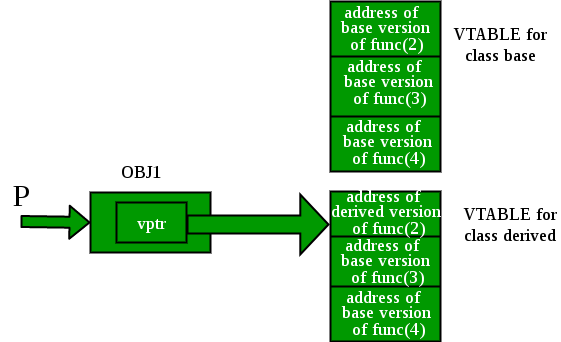


In [7]:
// C++ program to illustrate
// working of Virtual Functions

class base_1 {
public:
    void fun_1() { cout << "base-1\n"; }
    virtual void fun_2() { cout << "base-2\n"; }
    virtual void fun_3() { cout << "base-3\n"; }
    virtual void fun_4() { cout << "base-4\n"; }
};

class derived_1 : public base_1 {
public:
    void fun_1() { cout << "derived-1\n"; }
    void fun_2() { cout << "derived-2\n"; }
    void fun_4(int x) { cout << "derived-4\n"; }
};

    base_1* p;
    derived_1 obj1;
    p = &obj1;
 
    // Early binding because fun1() is non-virtual
    // in base
    p->fun_1();
 
    // Late binding (RTP)
    p->fun_2();
 
    // Late binding (RTP)
    p->fun_3();
 
    // Late binding (RTP)
    p->fun_4();
 
    // Early binding but this function call is
    // illegal (produces error) because pointer
    // is of base type and function is of
    // derived class
    // p->fun_4(5);

base-1
derived-2
base-3
base-4


Explanation:

Initially, we create a pointer of the type base class and initialize it with the address of the derived class object. 

When we create an object of the derived class, the compiler creates a pointer as a data member of the class containing the address of VTABLE of the derived class.

A similar concept of Late and Early Binding is used as in the above example. 

For the fun_1() function call, the base class version of the function is called, 

fun_2() is overridden in the derived class so the derived class version is called, 

fun_3() is not overridden in the derived class and is a virtual function so the base class version is called, 

similarly fun_4() is not overridden so base class version is called.

### How does the compiler perform runtime resolution?
The compiler maintains two things to serve this purpose:

- vtable: A table of function pointers, maintained per class. 
- vptr: A pointer to vtable, maintained per object instance (see this for an example).

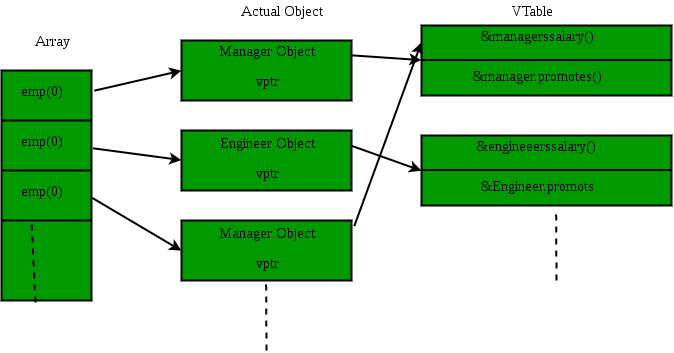

The compiler adds additional code at two places to maintain and use vptr.

1. Code in every constructor. This code sets the vptr of the object being created. This code sets vptr to point to the vtable of the class. 

2. Code with polymorphic function call. Wherever a polymorphic call is made, the compiler inserts code to first look for vptr using a base class pointer or reference (In the above example, since the pointed or referred object is of a derived type, vptr of a derived class is accessed). Once vptr is fetched, vtable of derived class can be accessed. Using vtable, the address of the derived class function show() is accessed and called.

### Limitations of Virtual Functions
- Slower: The function call takes slightly longer due to the virtual mechanism and makes it more difficult for the compiler to optimize because it does not know exactly which function is going to be called at compile time.
- Difficult to Debug: In a complex system, virtual functions can make it a little more difficult to figure out where a function is being called from.

## Virtual destructors, virtual assignment, and overriding virtualization

### Virtual destructors
Although C++ provides a default destructor for your classes if you do not provide one yourself, it is sometimes the case that you will want to provide your own destructor (particularly if the class needs to deallocate memory). You should always make your destructors virtual if you’re dealing with inheritance. 

Rule

Whenever you are dealing with inheritance, you should make any explicit destructors virtual.

As with normal virtual member functions, if a base class function is virtual, all derived overrides will be considered virtual regardless of whether they are specified as such. It is not necessary to create an empty derived class destructor just to mark it as virtual.

Note that if you want your base class to have a virtual destructor that is otherwise empty, you can define your destructor this way:

```virtual ~Base() = default; // generate a virtual default destructor```

#### Virtual assignment

It is possible to make the assignment operator virtual. However, unlike the destructor case where virtualization is always a good idea, virtualizing the assignment operator really opens up a bag full of worms and gets into some advanced topics outside of the scope of this tutorial. Consequently, we are going to recommend you leave your assignments non-virtual for now, in the interest of simplicity.

#### Ignoring virtualization

Use scope resolution operator in such cases
```
// Calls Base::getName() instead of the virtualized Derived::getName()
std::cout << base.Base::getName() << '\n';
```

#### Should we make all destructors virtual?

if the base class destructor isn’t marked as virtual, then the program is at risk for leaking memory if a programmer later deletes a base class pointer that is pointing to a derived object. One way to avoid this is to mark all your destructors as virtual. But should you?

It’s easy to say yes, so that way you can later use any class as a base class -- but there’s a performance penalty for doing so (a virtual pointer added to every instance of your class). So you have to balance that cost, as well as your intent.

Conventional wisdom (as initially put forth by Herb Sutter, a highly regarded C++ guru) has suggested avoiding the non-virtual destructor memory leak situation as follows, “A base class destructor should be either public and virtual, or protected and nonvirtual.” A class with a protected destructor can’t be deleted via a pointer, thus preventing the accidental deleting of a derived class through a base pointer when the base class has a non-virtual destructor. Unfortunately, this also means the base class can’t be deleted through a base class pointer, which essentially means the class can’t be dynamically allocated or deleted except by a derived class. This also precludes using smart pointers (such as std::unique_ptr and std::shared_ptr) for such classes, which limits the usefulness of that rule. It also means the base class can’t be allocated on the stack. That’s a pretty heavy set of penalties.

Now that the final specifier has been introduced into the language, our recommendations are as follows:

- If you intend your class to be inherited from, make sure your destructor is virtual.
- If you do not intend your class to be inherited from, mark your class as final. This will prevent other classes from inheriting from it in the first place, without imposing any other use restrictions on the class itself.